In [4]:
import requests as rq
import bs4 as bs4
import time
import json
import pandas as pd
import numpy as np

# Parte 1 

Coleta base

In [2]:
url_casa = "https://procureimovel.com.br/venda/ponta-grossa-pr/casa?page={}"

In [74]:
# Coletando os dados da página principal de casas 
# Primeira coleta

for x in range(1,135):
    urll = url_casa.format(x)
    #print(urll)
    response = rq.get(urll)

    with open('./dados_brutos/casa_{}.html'.format(x), "w+", encoding="utf-8") as output:
        output.write(response.text)
    time.sleep(2)

# Parte 2
Links para as páginas e title

In [12]:
# Segunda coleta
# Vai coletar os links das páginas e o title 

for x in range(1,135):
    with open('./dados_brutos/casa_{}.html'.format(x), 'r+', encoding="utf-8") as inp:
            page_html = inp.read()
            parsed = bs4.BeautifulSoup(page_html)
            tags = parsed.findAll("div", "listing-item")
    for e in tags:
        tags_ = e.find_all('a')
        for f in tags_:
            link = f['href']
            if f.has_attr('title'):
                title = f['title']
                with open('link_and_title.json', 'a+') as output:
                    data = {'link': link, 'title': title}
                    output.write('{}\n'.format(json.dumps(data)))

In [40]:
df = pd.read_json('link_and_title.json', lines=True)

In [41]:
df

,link,title
0,https://procureimovel.com.br/imovel/casa-venda...,"Casa de 164m² à Venda, 3 quartos - Ref. 132860-4"
1,https://procureimovel.com.br/imovel/casa-venda...,Casa com 3 quartos à Venda - Ref. 148460-4
2,https://procureimovel.com.br/imovel/casa-venda...,Casa com 3 quartos à Venda - Ref. 154166-4
3,https://procureimovel.com.br/imovel/casa-venda...,Casa com 2 quartos à Venda - Ref. 134986-4
4,https://procureimovel.com.br/imovel/casa-venda...,"Casa de 70m² à Venda, 2 quartos - Ref. 134520-4"
...,...,...
3989,https://procureimovel.com.br/imovel/casa-venda...,Casa à Venda em Ponta Grossa - Ref. 134613-4
3990,https://procureimovel.com.br/imovel/casa-venda...,"Casa de 990m² à Venda, 4 quartos - Ref. 134592-4"
3991,https://procureimovel.com.br/imovel/casa-venda...,"Casa de 638m² à Venda, 6 quartos - Ref. 142989-4"
3992,https://procureimovel.com.br/imovel/casa-venda...,"Casa de 335m² à Venda, 3 quartos - Ref. 102109-4"


# Parte 3

In [42]:
lista_de_links = df['link'].unique()

In [43]:
lista_de_links.shape

(3963,)

In [18]:
x = 0

inicio = time.time()
for link in lista_de_links:
    #print(link)
    response = rq.get(link)
    with open('./dados_brutos/imovel_{}.html'.format(x), '+w',  encoding="utf-8") as output:
        output.write(response.text)
    #time.sleep(2)
    x = x + 1
fim = time.time()
print("Tempo para processamento de {} páginas: {:.2f}".format(lista_de_links.shape[0], (fim - inicio)))

Tempo para processamento de 4206 páginas: 791.3360860347748


# Parte 4

In [47]:
data = {}
inicio = time.time()
for x in range(0,lista_de_links.shape[0]):
    with open('./dados_brutos/imovel_{}.html'.format(x), 'r+', encoding="utf-8") as inp:
        page_html = inp.read()
        parsed = bs4.BeautifulSoup(page_html)
        tags = parsed.findAll("ul", "property-features margin-top-0")
        if len(tags) == 0:
            continue
        tags = tags[0].findAll('li')
        for e in tags:
            vetor_palavras = 0
            textos = e.get_text()
            vetor_palavras = textos.split(':')
            data[vetor_palavras[0]] = vetor_palavras[-1]
        with open('informacao_casas.json', 'a+') as output:
            output.write('{}\n'.format(json.dumps(data)))
        data.clear()
fim = time.time()
print("Tempo para processamento de {} páginas: {:.2f}".format(lista_de_links.shape[0], (fim - inicio)))

Tempo para processamento de 3963 páginas: 166.59


In [48]:
df = pd.read_json(open("informacao_casas.json", "r", encoding="utf8"), lines=True)

In [49]:
df.shape

(3963, 16)

# Parte 5
Limpeza dos dados

In [27]:
df = pd.read_csv('info.csv')

In [39]:
df['Valor Venda']

0        R$ 430.000
1        R$ 350.000
2        R$ 300.000
3        R$ 190.000
4        R$ 190.000
           ...     
8164     R$ 720.000
8165     R$ 720.000
8166     R$ 719.712
8167     R$ 702.718
8168     R$ 700.000
Name: Valor Venda, Length: 8169, dtype: object

In [ ]:
df.drop(columns='Área Construída', inplace=True)
df.drop(columns='Aceita Permuta', inplace=True)
df.drop(columns='Área Privativa', inplace=True)
df.drop(columns='Área Útil', inplace=True)
df.drop(columns='Ano de Construção', inplace=True)
df.drop(columns='IPTU', inplace=True)
df.drop(columns='Condomínio', inplace=True)

In [93]:
def transformaEmInt(x):
    x = str(x)
    y = str(np.NaN)
    if x == y:
        return ''
    else:
        return x.astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quartos           3558 non-null   float64
 1   Banheiros         3319 non-null   float64
 2   Vagas de Garagem  2630 non-null   float64
 3   Área Total        2973 non-null   object 
 4   Valor Venda       3959 non-null   object 
 5   Bairro            3582 non-null   object 
 6   Endereço          3843 non-null   object 
 7   Referência        3963 non-null   object 
 8   Suítes            1861 non-null   Int64  
 9   Tipo              3963 non-null   object 
dtypes: Int64(1), float64(3), object(6)
memory usage: 313.6+ KB


In [8]:
df['Tipo'] = 'Casa'

In [26]:
df['Suítes'] = df['Suítes'].astype('int')

ValueError: cannot convert to 'int32'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [30]:
df['Suítes'][0] == np.NaN

False

In [34]:
converted = df['Quartos'].convert_dtypes()

In [35]:
converted

0       3
1       3
2       3
3       2
4       2
       ..
3958    3
3959    3
3960    3
3961    4
3962    4
Name: Quartos, Length: 3963, dtype: Int64

In [85]:
f = df['Suítes'][25]

In [100]:
f == np.NaN

False

In [12]:
df['Suítes'].fillna(356, inplace = True)

In [25]:
df['Suítes'] = df['Suítes'].astype(int)

In [26]:
df['Suítes']

0       356
1         1
2         1
3       356
4       356
       ... 
3958      1
3959      2
3960    356
3961      1
3962      3
Name: Suítes, Length: 3963, dtype: int32

In [24]:
df['Suítes'].replace(356, np.NaN)

0       NaN
1       1.0
2       1.0
3       NaN
4       NaN
       ... 
3958    1.0
3959    2.0
3960    NaN
3961    1.0
3962    3.0
Name: Suítes, Length: 3963, dtype: float64

In [ ]:
df['Quartos']

In [74]:
dff = df['Suítes'].infer_objects()

In [76]:
dff = pd.to_numeric(df['Suítes'], downcast='integer')

In [79]:
teste = pd.read_csv('houses_to_rent_v2.csv')

In [82]:
teste.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [37]:
dff = kk.replace('OI',np.NaN)

In [58]:
dff

0       nan
1       1.0
2       1.0
3       nan
4       nan
       ... 
3958    1.0
3959    2.0
3960    nan
3961    1.0
3962    3.0
Name: Suítes, Length: 3963, dtype: object

In [48]:
dff[25] == str(np.NaN)

True

In [62]:
fg = pd.to_numeric(dff, errors='coerce', downcast='integer')

In [68]:
fg = fg.astype(np.int, errors='ignore')

AttributeError: 'Series' object has no attribute 'type'

In [52]:
tags = parsed.findAll("ul", "property-features margin-top-0")

In [77]:
tags = tags[0].findAll('li')

In [80]:
for f in tags:
    textos = f.get_text()
    vetor_palavras = textos.split(':')
    print(vetor_palavras)
    if 'Referência:' in textos:
        break

['Quartos', ' 3']
['Suítes', ' 1']
['Banheiros', ' 2']
['Vagas de Garagem', ' 3']
['Valor Venda', ' R$ 350.000']
['Bairro', ' Jardim Carvalho']
['Endereço', ' Av. Rocha Pombo']
['Referência', ' 148460-4']


In [57]:
textos = tags[1].get_text()

IndexError: list index out of range

In [82]:
data = {}

In [83]:
type(data)

dict

In [84]:
for e in tags:
    textos = e.get_text()
    vetor_palavras = textos.split(':')
    data[vetor_palavras[0]] = vetor_palavras[-1]
    if 'Referência:' in textos:
        break         

In [92]:
data['Deu'] = 'meu piru'

In [ ]:

    if 'Valor' in textos:
        valor = vetor_palavras[-1]
        
    if 'Quartos' in textos:
        quartos = vetor_palavras[-1]
        
    if 'Suítes' in textos:
        valor = vetor_palavras[-1]
        
    if 'Banheiros' in textos:
        quartos = vetor_palavras[-1] 

    if 'Garagem' in textos:
        quartos = vetor_palavras[-1] 

In [93]:
with open('parsed_videos4.json', 'a+') as output:
        output.write('{}\n'.format(json.dumps(data)))

In [44]:
quartos

'3'

In [30]:
data_item = pd.read_json(open("parsed_videos3.json", "r", encoding="utf8"),lines=True)

In [118]:
df = pd.read_json(open("parsed_videos8.json", "r", encoding="utf8"), lines=True)

In [49]:
df

,Quartos,Banheiros,Vagas de Garagem,Área Total,Valor Venda,Bairro,Endereço,Referência,Suítes,Área Construída,Aceita Permuta
0,3.0,2.0,2.0,164 m2,R$ 430.000,Uvaranas,"Rua Casemiro de Abreu, 839",132860-4,NaN,NaN,NaN
1,3.0,2.0,3.0,NaN,R$ 350.000,Jardim Carvalho,Av. Rocha Pombo,148460-4,1.0,NaN,NaN
2,3.0,1.0,1.0,NaN,R$ 300.000,Oficinas,NaN,154166-4,1.0,NaN,NaN
3,2.0,1.0,1.0,NaN,R$ 190.000,NaN,RUA JOSÉ MACHADO DE OLIVEIRA,134986-4,NaN,NaN,NaN
4,2.0,1.0,1.0,70 m2,R$ 190.000,NaN,Rua José Machado de Oliveira,134520-4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
114,3.0,3.0,3.0,200 m2,R$ 620.000,Jardim Carvalho,"Rua Raul Pompéia, 31",85786-4,1.0,NaN,NaN
115,3.0,NaN,NaN,225 m2,R$ 620.000,Nova Rússia,"Rua Pastor Fugmann, 411",146209-4,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,R$ 620.000,Nova Rússia,LISANDRO ALVES DE ARAUJO,109512-4,NaN,NaN,NaN
117,4.0,3.0,2.0,NaN,R$ 620.000,Jardim Carvalho,"Rua Rocha Pombo, 1565",130881-4,1.0,NaN,NaN


In [34]:
tags[3].get_text()

'Valor R$ 350.000'

In [152]:
vetor_palavras = tags[3].get_text().split()

In [153]:
vetor_palavras

['Valor', 'R$', '350.000']

In [154]:
vetor_palavras[0]

'Valor'

In [164]:
str(vetor_palavras[-1])

'350.000'

In [23]:
len(df['Referência'].unique())

30

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quartos            3558 non-null   float64
 1   Banheiros          3319 non-null   float64
 2   Vagas de Garagem   2630 non-null   float64
 3   Área Total         2973 non-null   object 
 4   Valor Venda        3959 non-null   object 
 5   Bairro             3582 non-null   object 
 6   Endereço           3843 non-null   object 
 7   Referência         3963 non-null   object 
 8   Suítes             1861 non-null   float64
 9   Área Construída    47 non-null     object 
 10  Aceita Permuta     2 non-null      object 
 11  Área Privativa     2 non-null      object 
 12  Área Útil          18 non-null     object 
 13  Ano de Construção  7 non-null      float64
 14  Condomínio         175 non-null    object 
 15  IPTU               2 non-null      object 
dtypes: float64(5), object(11

In [25]:
import matplotlib.pyplot as plt

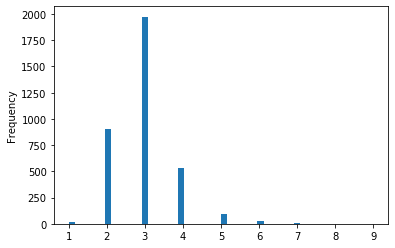

In [111]:
df['Quartos'].plot(kind = 'hist', bins=50)

In [21]:
corr = df.corr(method = 'spearman')
corr.style.background_gradient(cmap='cividis')

,Quartos,Banheiros,Vagas de Garagem,Suítes,Ano de Construção
Quartos,1.000000,0.526082,0.481449,0.333774,-0.433333
Banheiros,0.526082,1.000000,0.501620,0.449755,-0.326984
Vagas de Garagem,0.481449,0.501620,1.000000,0.267075,0.233333
Suítes,0.333774,0.449755,0.267075,1.000000,-0.235702
Ano de Construção,-0.433333,-0.326984,0.233333,-0.235702,1.000000


In [62]:
pp = 4

In [63]:
z[pp]

' R$ 190.000'

In [65]:
float(z[pp].replace('R$', ''))*1000

190000.0

In [67]:
asdss = df['Valor Venda'].replace('R$', '')

In [68]:
asdss

0       R$ 430.000
1       R$ 350.000
2       R$ 300.000
3       R$ 190.000
4       R$ 190.000
          ...     
114     R$ 620.000
115     R$ 620.000
116     R$ 620.000
117     R$ 620.000
118     R$ 620.000
Name: Valor Venda, Length: 119, dtype: object

In [32]:
df.columns

Index(['Quartos', 'Banheiros', 'Vagas de Garagem', 'Área Total', 'Valor Venda',
       'Bairro', 'Endereço', 'Referência', 'Suítes', 'Área Construída',
       'Aceita Permuta', 'Área Privativa', 'Área Útil', 'Ano de Construção',
       'Condomínio', 'IPTU'],
      dtype='object')

In [34]:
df.drop(columns='Área Construída', inplace=True)

In [45]:
df.to_csv('info.csv',index=False)

In [28]:
ff = pd.read_csv('info.csv')

In [29]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Quartos            3558 non-null   float64
 1   Banheiros          3319 non-null   float64
 2   Vagas de Garagem   2630 non-null   float64
 3   Área Total         2973 non-null   object 
 4   Valor Venda        3959 non-null   object 
 5   Bairro             3582 non-null   object 
 6   Endereço           3843 non-null   object 
 7   Referência         3963 non-null   object 
 8   Suítes             1861 non-null   float64
 9   Área Construída    47 non-null     object 
 10  Aceita Permuta     2 non-null      object 
 11  Área Privativa     2 non-null      object 
 12  Área Útil          18 non-null     object 
 13  Ano de Construção  7 non-null      float64
 14  Condomínio         175 non-null    object 
 15  IPTU               2 non-null      object 
dtypes: float64(5), object(11